In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importamos el dataset "creditcard.csv"

In [3]:
datos = pd.read_csv("C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\creditcard.csv")
print(datos.head())

nr_clases = datos['Class'].value_counts(sort=True)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Hagamos una exploración preliminar de los datos. Con ello podremos verificar que no hay una forma simple de detectar los fraudes, lo que justificará el uso de un Autoencoder.

En primer lugar podemos obtener una gráfica que muestre la distribución de los registros “normales” y “fraudulentos”

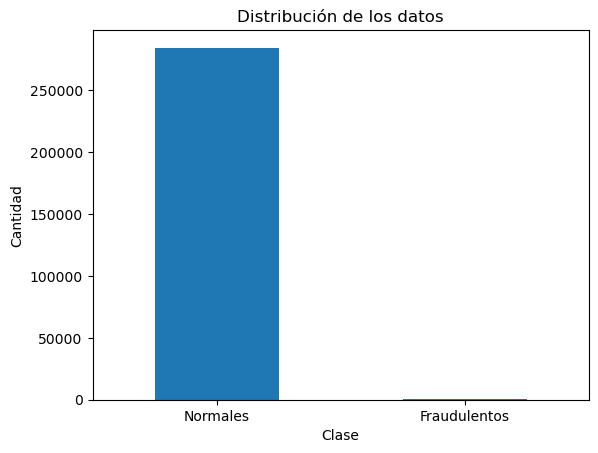

In [4]:
nr_clases.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Normales', 'Fraudulentos'])
plt.title("Distribución de los datos")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

Veamos ahora cómo se comportan los dos tipos de dato con respecto al tiempo:

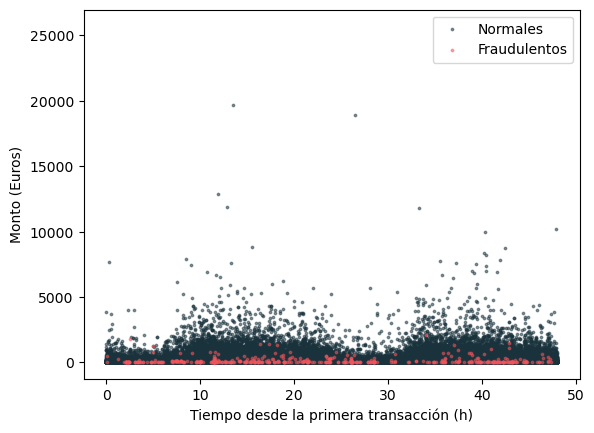

In [5]:
normales = datos[datos.Class==0]
fraudulentos = datos[datos.Class==1]
plt.scatter(normales.Time/3600, normales.Amount,
	alpha = 0.5, c='#19323C', label='Normales', s=3)
plt.scatter(fraudulentos.Time/3600, fraudulentos.Amount,
	alpha = 0.5, c='#F2545B', label='Fraudulentos', s=3)
plt.xlabel('Tiempo desde la primera transacción (h)')
plt.ylabel('Monto (Euros)')
plt.legend(loc='upper right')
plt.show()

¿Es posible que el monto de cada transacción nos permita diferenciar un tipo de dato de otro?:

Al observar la distribución de transacciones con respecto al monto, vemos que tampoco hay una clara diferencia, pues a pesar de que los registros “fraudulentos” tienden a tener montos más bajos, de todos modos estos se solapan con la distribución de los registros “normales”.

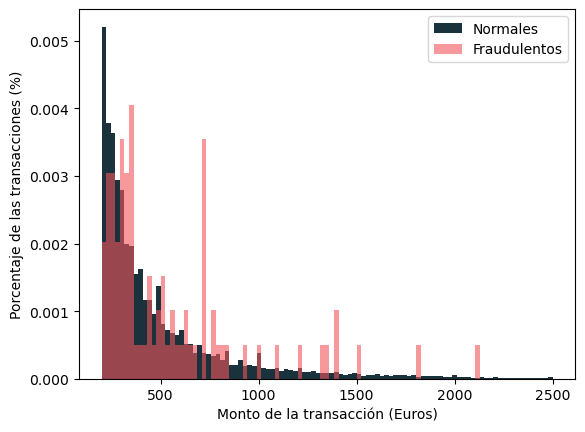

In [6]:
import numpy as np

bins = np.linspace(200, 2500, 100)
plt.hist(normales.Amount, bins, alpha=1, density=True,
	label='Normales', color='#19323C')
plt.hist(fraudulentos.Amount, bins, alpha=0.6,
	density=True, label='Fraudulentos', color='#F2545B')
plt.legend(loc='upper right')
plt.xlabel("Monto de la transacción (Euros)")
plt.ylabel("Porcentaje de las transacciones (%)")
plt.show()

Iniciamos el preprocesamiento de los datos

Comencemos eliminando la característica “tiempo” del set de datos (pues, como vimos anteriormente, no brinda información relevante):

In [7]:
from sklearn.preprocessing import StandardScaler
datos.drop(['Time'], axis=1, inplace=True)

Normalizamos la caracteristica "amount"

In [8]:
datos['Amount'] = StandardScaler().fit_transform(datos['Amount'].values.reshape(-1,1))

Hacemos la division del dataset en datos de entrenamiento y datos de validacion

Hacemos la division de los datos

In [9]:
from sklearn.model_selection import train_test_split

#X_train, X_test = train_test_split(datos, test_size=0.3, random_state=42)
#X_train = X_train[X_train.Class == 0]  ## Usaremos únicamente la clase 0 (transacciones normales)
#X_train = X_train.drop(['Class'], axis=1)
#X_train = X_train.values

#Y_test = X_test['Class']
#X_test = X_test.drop(['Class'], axis=1)
#X_test = X_test.values


# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(datos, test_size=0.3, random_state=42)

# Obtenemos las etiquetas de clase para el conjunto de entrenamiento y prueba
Y_train = X_train['Class']
Y_test = X_test['Class']

# Eliminamos la columna de clase de los conjuntos de características
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)

# Convertimos los conjuntos de características a formato de matriz numpy
X_train = X_train.values
X_test = X_test.values


Se inicia la creacion del autoenconde con las siguientes caractersticas



*   29 entradas, correspondientes al número de características de cada dato de entrenamiento
*   El encoder, encargado de obtener una representación compacta de la entrada, tendrá una primera capa con 20 neuronas, con función de activación tanh seguida de otra capa con 14 neuronas y activación ReLU. Esto quiere decir que el dato comprimido tendrá un tamaño igual a 14.


*   El decoder, encargado de reconstruir el dato original a partir de su versión comprimida, tendrá una capa con 20 neuronas y activación tanh seguida por la capa de salida con 1 neurona y activación sigmoide, cuya salida corresponde a la pertenencia o no a la clase.



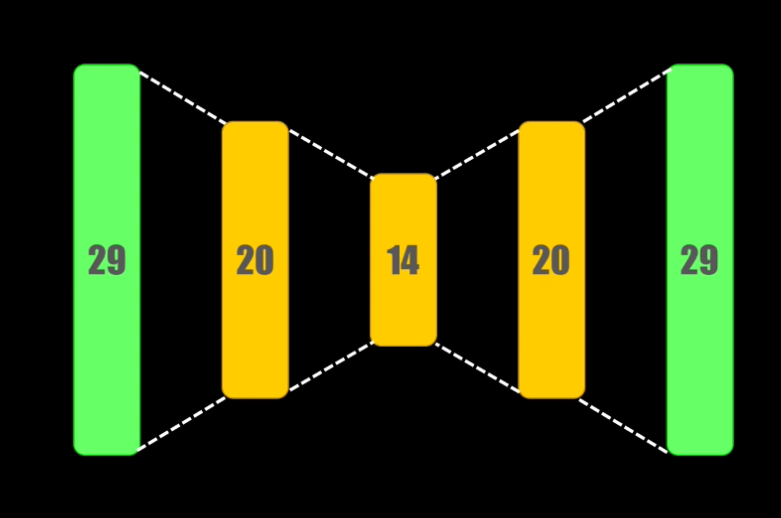


Creamos la capa de entrada

In [10]:
import numpy as np
np.random.seed(5)# esta linea es para fijar la semilla del generador aleatorio y de esta manera
#garantizar de esta forma la reproducibilidad del algoritmo
from keras.layers import Input

dim_entrada = X_train.shape[1]
capa_entrada = Input(shape=(dim_entrada,))
print(dim_entrada)

 creamos el encoder con dos capas, de 20 y 14 neuronas, y funciones de activación tanh y relu respectivamente

In [ ]:
from keras.layers import Dense

#Este encoder permite pasar de un dato de

encoder = Dense(20, activation='tanh')(capa_entrada)
encoder = Dense(14, activation='relu')(encoder)

hora implementaremos el decoder, que realiza el proceso de reconstrucción del dato, pasando de una representación compacta con 14 características a 1 sola neurona de salida para indicar si pertenece o no a la clase.

El decoder tendrá entonces dos capas: la primera con 20 y la segunda con 1 neurona. Acá usamos nuevamente las funciones de activación tanh y relu

In [ ]:
decoder = Dense(20, activation='tanh')(encoder)
#capa de salida para la clasificacion binaria
decoder = Dense(1, activation='sigmoid')(decoder)

Finalmente, combinamos la capa de entrada, el encoder y el decoder en un modelo de Keras, que será precisamente el autoencoder. Esto lo hacemos con la función Model, donde basta únicamente con especificar la capa de entrada y el decoder, y Keras automáticamente se encarga de interconectar todos los objetos

In [ ]:
from keras.models import Model

autoencoder = Model(inputs=capa_entrada, outputs=decoder)



También debemos definir la función de perdida, que en este caso será el binary_crossentropy.

Finalmente, todos estos parámetros se definen a través de la función compile

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Entrenaremos el modelo usando un total de 100 iteraciones, y usando tamaños de lote de 32 (es decir, presentaremos al modelo bloques de 32 ejemplos durante el entrenamiento).

In [ ]:
nits = 5
tam_lote = 32
#autoencoder.fit(X_train, X_train, epochs=nits, batch_size=tam_lote, shuffle=True, validation_data=(X_test,X_test), verbose=1)
autoencoder.fit(X_train, Y_train, epochs=nits, batch_size=tam_lote, shuffle=True, validation_data=(X_test,Y_test), verbose=1)


Epoch 1/5
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0143 - val_loss: 0.0029
Epoch 2/5
6231/6231 [==============================] - 15s 2ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 3/5
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 4/5
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 5/5
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0027 - val_loss: 0.0030


In [ ]:
from sklearn.metrics import confusion_matrix
# Evaluación del modelo
Y_pred_proba = autoencoder.predict(X_test)
# Umbral de decisión para clasificación binaria
umbral_fijo = 0.5
Y_pred = [1 if proba > umbral_fijo else 0 for proba in Y_pred_proba]

# Evaluación adicional, como matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

2671/2671 [==============================] - 7s 2ms/step
[[85269    38]
 [   24   112]]


In [ ]:
# Seleccionar un registro de X_test
indice_registro = 0  # Puedes cambiar este índice según el registro que desees seleccionar
registro = X_test[indice_registro]

# Obtener la salida del autoencoder para el registro seleccionado
salida_autoencoder = autoencoder.predict(registro.reshape(1, -1))

# Imprimir la salida del autoencoder
print("Registro de entrada:")
print(registro)
print("\nSalida del autoencoder:")
print(salida_autoencoder.flatten())


1/1 [==============================] - 0s 21ms/step
Registro de entrada:
[-16.52650657   8.5849718  -18.64985319   9.50559352 -13.79381853
  -2.8324043  -16.7016943    7.5173439   -8.50705864 -14.11018444
   5.29923635 -10.83400648   1.67112025  -9.37385858   0.36080564
  -9.89924654 -19.23629237  -8.39855199   3.10173537  -1.51492344
   1.19073869  -1.12767001  -2.35857877   0.67346133  -1.41369967
  -0.46276236  -2.01857525  -1.04280417   1.10283362]

Salida del autoencoder:
[0.9735295]


Como el modelo fue entrenado sólo con transacciones normales, es de esperar que al introducir un registro fraudulento la reconstrucción del dato no sea tan precisa y por tanto la diferencia entre el dato reconstruido y el original será más grande que la obtenida cuando el dato ingresado es normal

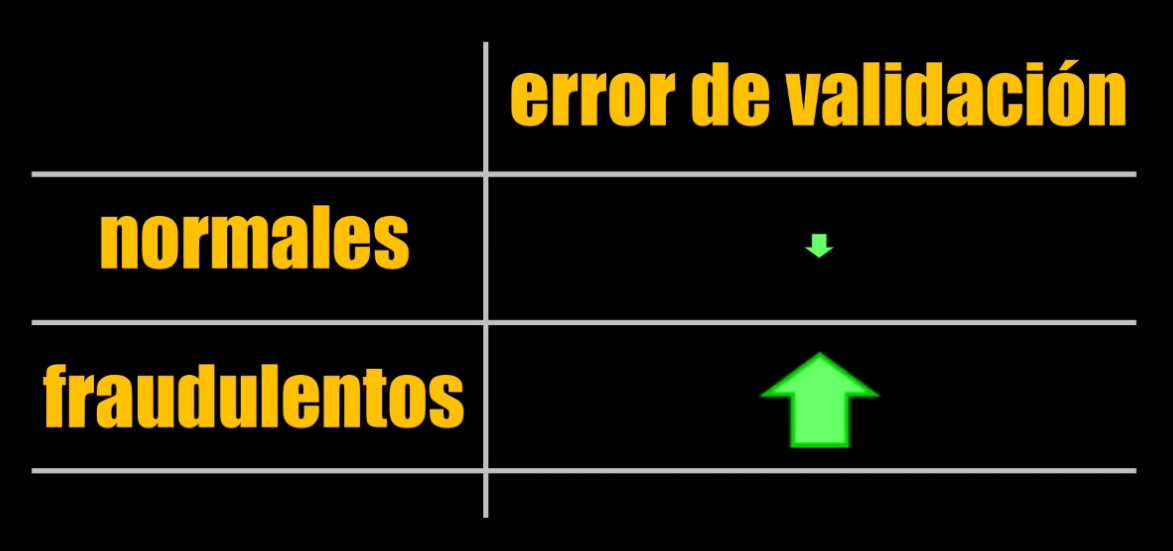

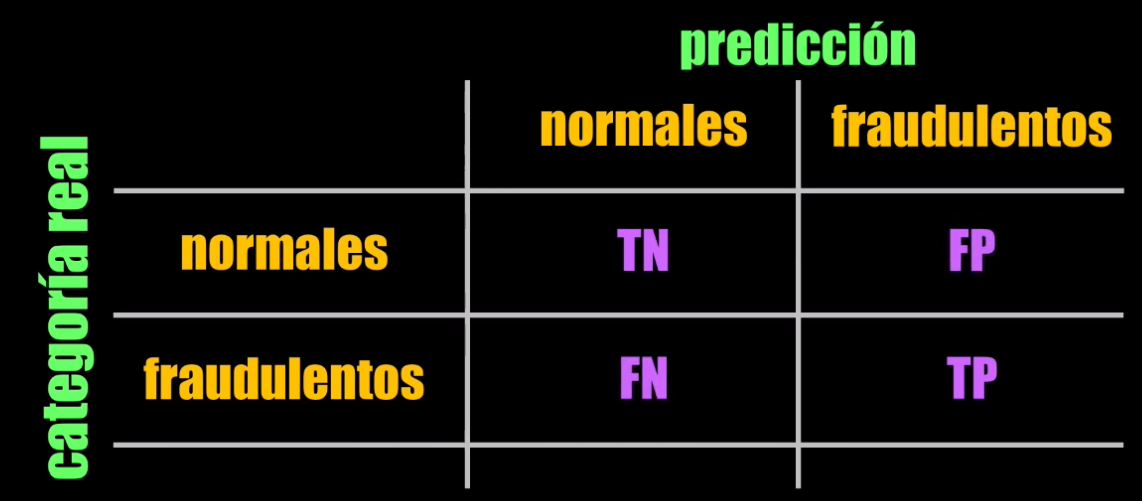